# Prueba de evaluación 3 Entornos de data science con Python

**Parte 1:**

Como os indiqué en clase, en esta prueba abierta de temática libre trata de que hagáis un análisis de un dataset que vosotros seleccionéis (del repositorio de statsmodels, del de R o de cualquier otro que encontréis en Internet). Se valorará la presentación de las ideas de análisis, el uso de la herramienta de los Notebooks, gráficos que sean relevantes y de las bibliotecas del stack científico de Python. 
 
Solo se pide llegar al análisis estadístico básico, no a hacer modelos productivos con aprendizaje automático. No se pretende hacer un estudio estadístico inferencias avanzado sino un estudio exploratorio que muestre hallazgos interesantes en el dataset. Es muy valorable el cómo comuniquéis los hallazgos, por lo que no es cuestión de incluir todos los análisis, sino los que resulten informativos e interesantes, en formatos gráficos o numéricos fáciles de leer y entender. 

### Dataset de vuelos que salen o arrivan con retrasos para el año 2008

He selecionado un datasat de vuelos estraido del link http://stat-computing.org/dataexpo/2009/the-data.html, el cual contiene datos de trafico aereo de diferentes años. Para este ejercicio seleccione el 2008, como el dataset contiene todos los datos de vuelos, nos enfocaremos en los que tuvieron retrasos. 

Los campos que contiene el dataset son:

|No.  | Name |Description  |
|-----|-------------|
|1    | Year | 2008 |
|2    | Month | 1-12 |
|3    | DayofMonth | 1-31 |
|4    | DayOfWeek | 1 (Monday) - 7 (Sunday) |
|5    | DepTime | actual departure time (local, hhmm) |
|6    | CRSDepTime | scheduled departure time (local, hhmm) | 
|7    | ArrTime | actual arrival time (local, hhmm) |
|8    | CRSArrTime | scheduled arrival time (local, hhmm) |
|9    | UniqueCarrier | unique carrier code |
|10   | FlightNum | flight number |
|11   | TailNum | plane tail number |
|12   | ActualElapsedTime | in minutes| 
|13   | CRSElapsedTime | in minutes |
|14   | AirTime | in minutes |
|15   | ArrDelay | arrival delay, in minutes |
|16   | DepDelay | departure delay, in minutes |
|17   | Origin | origin IATA airport code |
|18   | Dest | destination IATA airport code |
|19   | Distance | in miles |
|20   | TaxiIn | taxi in time, in minutes |
|21   | TaxiOut | taxi out time in minutes |
|22   | Cancelled | was the flight cancelled? |
|23   | CancellationCode | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
|24   | Diverted | 1 = yes, 0 = no |
|25   | CarrierDelay | in minutes |
|26   | WeatherDelay | in minutes |
|27   | NASDelay | in minutes |
|28   | SecurityDelay | in minutes |
|29   | LateAircraftDelay | in minutes |

Los Codigos de las Aerolineas son:
    
| Cod | Nombre      |
|-----|-------------|
|AA | American Airlines Inc. |
|AQ | Air Co Ltd |
|AS | Alaska Airlines Inc. |
|B6 | JetBlue Airways |
|CO | South East Asian Airlines |
|DL | Delta Air Lines Inc.| 
|EV | ExpressJet Airlines Inc.|
|FL | AirTran Airways, Inc.|
|F9 | Frontier Airlines Inc. |
|HA | Hawaiian Airlines Inc. |
|MQ | Envoy Air |
|NK | Spirit Air Lines |
|NW | Northwest Airlines |
|OH | PSA Airlines, Inc.|
|OO | SkyWest Airlines Inc.| 
|UA | United Air Lines Inc.|
|US | US Airways Inc. |
|VX | Virgin America |
|WN | Southwest Airlines Co. |
|XE | Delux Public Charter LLC |
|YV | Mesa Airlines, Inc.|
|9E | Endeavor Air|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

%matplotlib inline

Cargo el archivo orginal 1 sola vez y lo transformo a mis registros seleccionados, lo guardo en un csv,
para poder abrirlo y trabajar sobre el archivo final de trabajo.

In [2]:
#fileop = '2008.csv'
#print "Operando archivo -- > " + fileop
#Flights = pd.read_csv(fileop, sep=',', header=0)
#Flights.head(10)

In [3]:
#Flights.loc[Flights['CancellationCode'].isnull(),'CancellationCode'] = 'N'
#np.unique(Flights['CancellationCode'])
#DelayedFlights = Flights[Flights['DepDelay'] > 5]
#DelayedFlights.index
#DelayedFlights.to_csv("DelayedFlights.csv")

A partir de ahora, solo cargaremos el archivo depurado. Para efectos de este ejercicio, considerar que se considera un vuelo demorado, si se demora mas de 5 minutos.

In [4]:
fileop = 'DelayedFlights.csv'
print "Operando archivo -- > " + fileop
DelayedFlights = pd.read_csv(fileop, sep=',', header=0)
DelayedFlights.head(10)
DelayedFlights.index

Operando archivo -- > DelayedFlights.csv


RangeIndex(start=0, stop=1936758, step=1)

** Podemos ver que hay 1,936,758 vuelos con retraso en el 2008, en los aeropuertos de USA **

Ordenaremos los datos, por fecha y hora, creamos 1 nueva columna para la agrupacion 

In [5]:
DelayedFlights.drop(['Unnamed: 0'],inplace=True,axis=1)
DelayedFlights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,706.0,700,916.0,915,WN,100,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [6]:
DelayedFlights['CRSDepTime'] = DelayedFlights['CRSDepTime'].apply(lambda x: '{0:0>4}'.format(x))
DelayedFlights['CRSDepTime'] = pd.to_datetime(DelayedFlights['CRSDepTime'], format='%H%M')
#DelayedFlights['DateTimeTS'] = pd.to_datetime(DelayedFlights['CRSDepTime'], format='%H%M')
DelayedFlights['CRSDepTime'] = DelayedFlights['CRSDepTime'].dt.time

In [7]:
DelayedFlights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,19:55:00,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,07:35:00,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,06:20:00,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,17:55:00,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,19:15:00,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1937.0,18:30:00,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,706.0,07:00:00,916.0,915,WN,100,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,1644.0,15:10:00,1845.0,1725,WN,1333,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,1029.0,10:20:00,1021.0,1010,WN,2272,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1452.0,14:25:00,1640.0,1625,WN,675,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [8]:
DelayedFlights.sort_values(by=['Year','Month','DayofMonth','CRSDepTime'], inplace=True)
DelayedFlights = DelayedFlights.reset_index(drop=True)
DelayedFlights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,1,2,45.0,00:25:00,547.0,535,AA,622,...,5.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,1,2,124.0,00:40:00,653.0,612,NW,362,...,6.0,13.0,0,N,0,10.0,0.0,0.0,0.0,31.0
2,2008,1,1,2,125.0,00:45:00,644.0,605,AA,1806,...,10.0,13.0,0,N,0,0.0,0.0,0.0,0.0,39.0
3,2008,1,1,2,110.0,00:55:00,759.0,803,DL,560,...,9.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,1,2,121.0,01:00:00,619.0,608,NW,166,...,6.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,1,2,131.0,01:08:00,826.0,740,DL,792,...,11.0,26.0,0,N,0,23.0,0.0,23.0,0.0,0.0
6,2008,1,1,2,136.0,01:10:00,613.0,600,AA,2454,...,5.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,1,2,152.0,01:46:00,940.0,917,US,634,...,4.0,14.0,0,N,0,6.0,0.0,17.0,0.0,0.0
8,2008,1,1,2,432.0,03:25:00,720.0,623,B6,708,...,11.0,14.0,0,N,0,0.0,0.0,0.0,0.0,57.0
9,2008,1,1,2,451.0,04:15:00,647.0,625,B6,768,...,8.0,18.0,0,N,0,18.0,0.0,0.0,0.0,4.0


In [9]:
DelayedFlights['DateTS'] = DelayedFlights.Year.map(str) + '/' + DelayedFlights.Month.map(str) + '/' \
                             + DelayedFlights.DayofMonth.map(str)
DelayedFlights['DateTS'] =  pd.to_datetime(DelayedFlights['DateTS'], format='%Y/%m/%d')

DelayedFlights['DateTimeTS'] = DelayedFlights.Year.map(str) + '/' + DelayedFlights.Month.map(str) + '/' \
                             + DelayedFlights.DayofMonth.map(str) + ' ' + DelayedFlights.CRSDepTime.map(str)
DelayedFlights['DateTimeTS'] =  pd.to_datetime(DelayedFlights['DateTimeTS'], format='%Y/%m/%d %H:%M')

DelayedFlights['DateTime'] = DelayedFlights.Year.map(str) + '/' + DelayedFlights.Month.map(str) + '/' \
                             + DelayedFlights.DayofMonth.map(str)

### Top 10 de aeropuertos con mas retrasos

In [10]:
Top10Airports = DelayedFlights.groupby('Origin').size()
Top10Airports.sort_values(inplace=True, ascending=False)
#Top10Airports[:10]

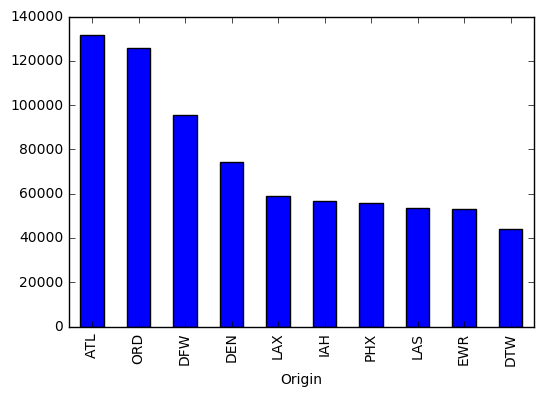

In [11]:

Top10Airports[:10].plot(kind='bar')

### Mapa de Aeropuertos con mas atrasos

|Cod | Nombre      |
|----|-------------|
|ATL | Hartsfield Jackson Atlanta International Airport, Atlanta |
|ORD | O'Hare International Airport, Chicago |
|DFW | Dallas/Fort Worth, Dallas |
|DEN | Denver International, Denver |
|LAX | Los Angeles International, California |
|IAH | George Bush Intercontinental Houston Airport, Houston |
|PHX | Phoenix Sky Harbor International Airport, Phoenix |
|LAS | McCarran International Airport, Las Vegas |
|EWR | Newark Liberty International Airport, Newark |
|DTW | Detroit Metropolitan Wayne County Airport, Detroit|

In [12]:
raw_data = {'Airports': ['ATL','ORD','DFW','DEN','LAX','IAH','PHX','LAS','EWR','DTW'],
    'latitude': [33.6366997, 41.9785996, 32.896801, 39.8616982, 33.9425011, 29.9843998, 33.4342995, 36.080101, 40.6925011, 42.2123985],
            'longitude': [-84.4281006, -87.9048004, -97.038002, -104.6729965, -118.4079971, -95.3414001, -112.012001, -115.1520004, -74.1687012, -83.3534012]}
dfAirports = pd.DataFrame(raw_data, columns = ['Airports', 'latitude', 'longitude'])

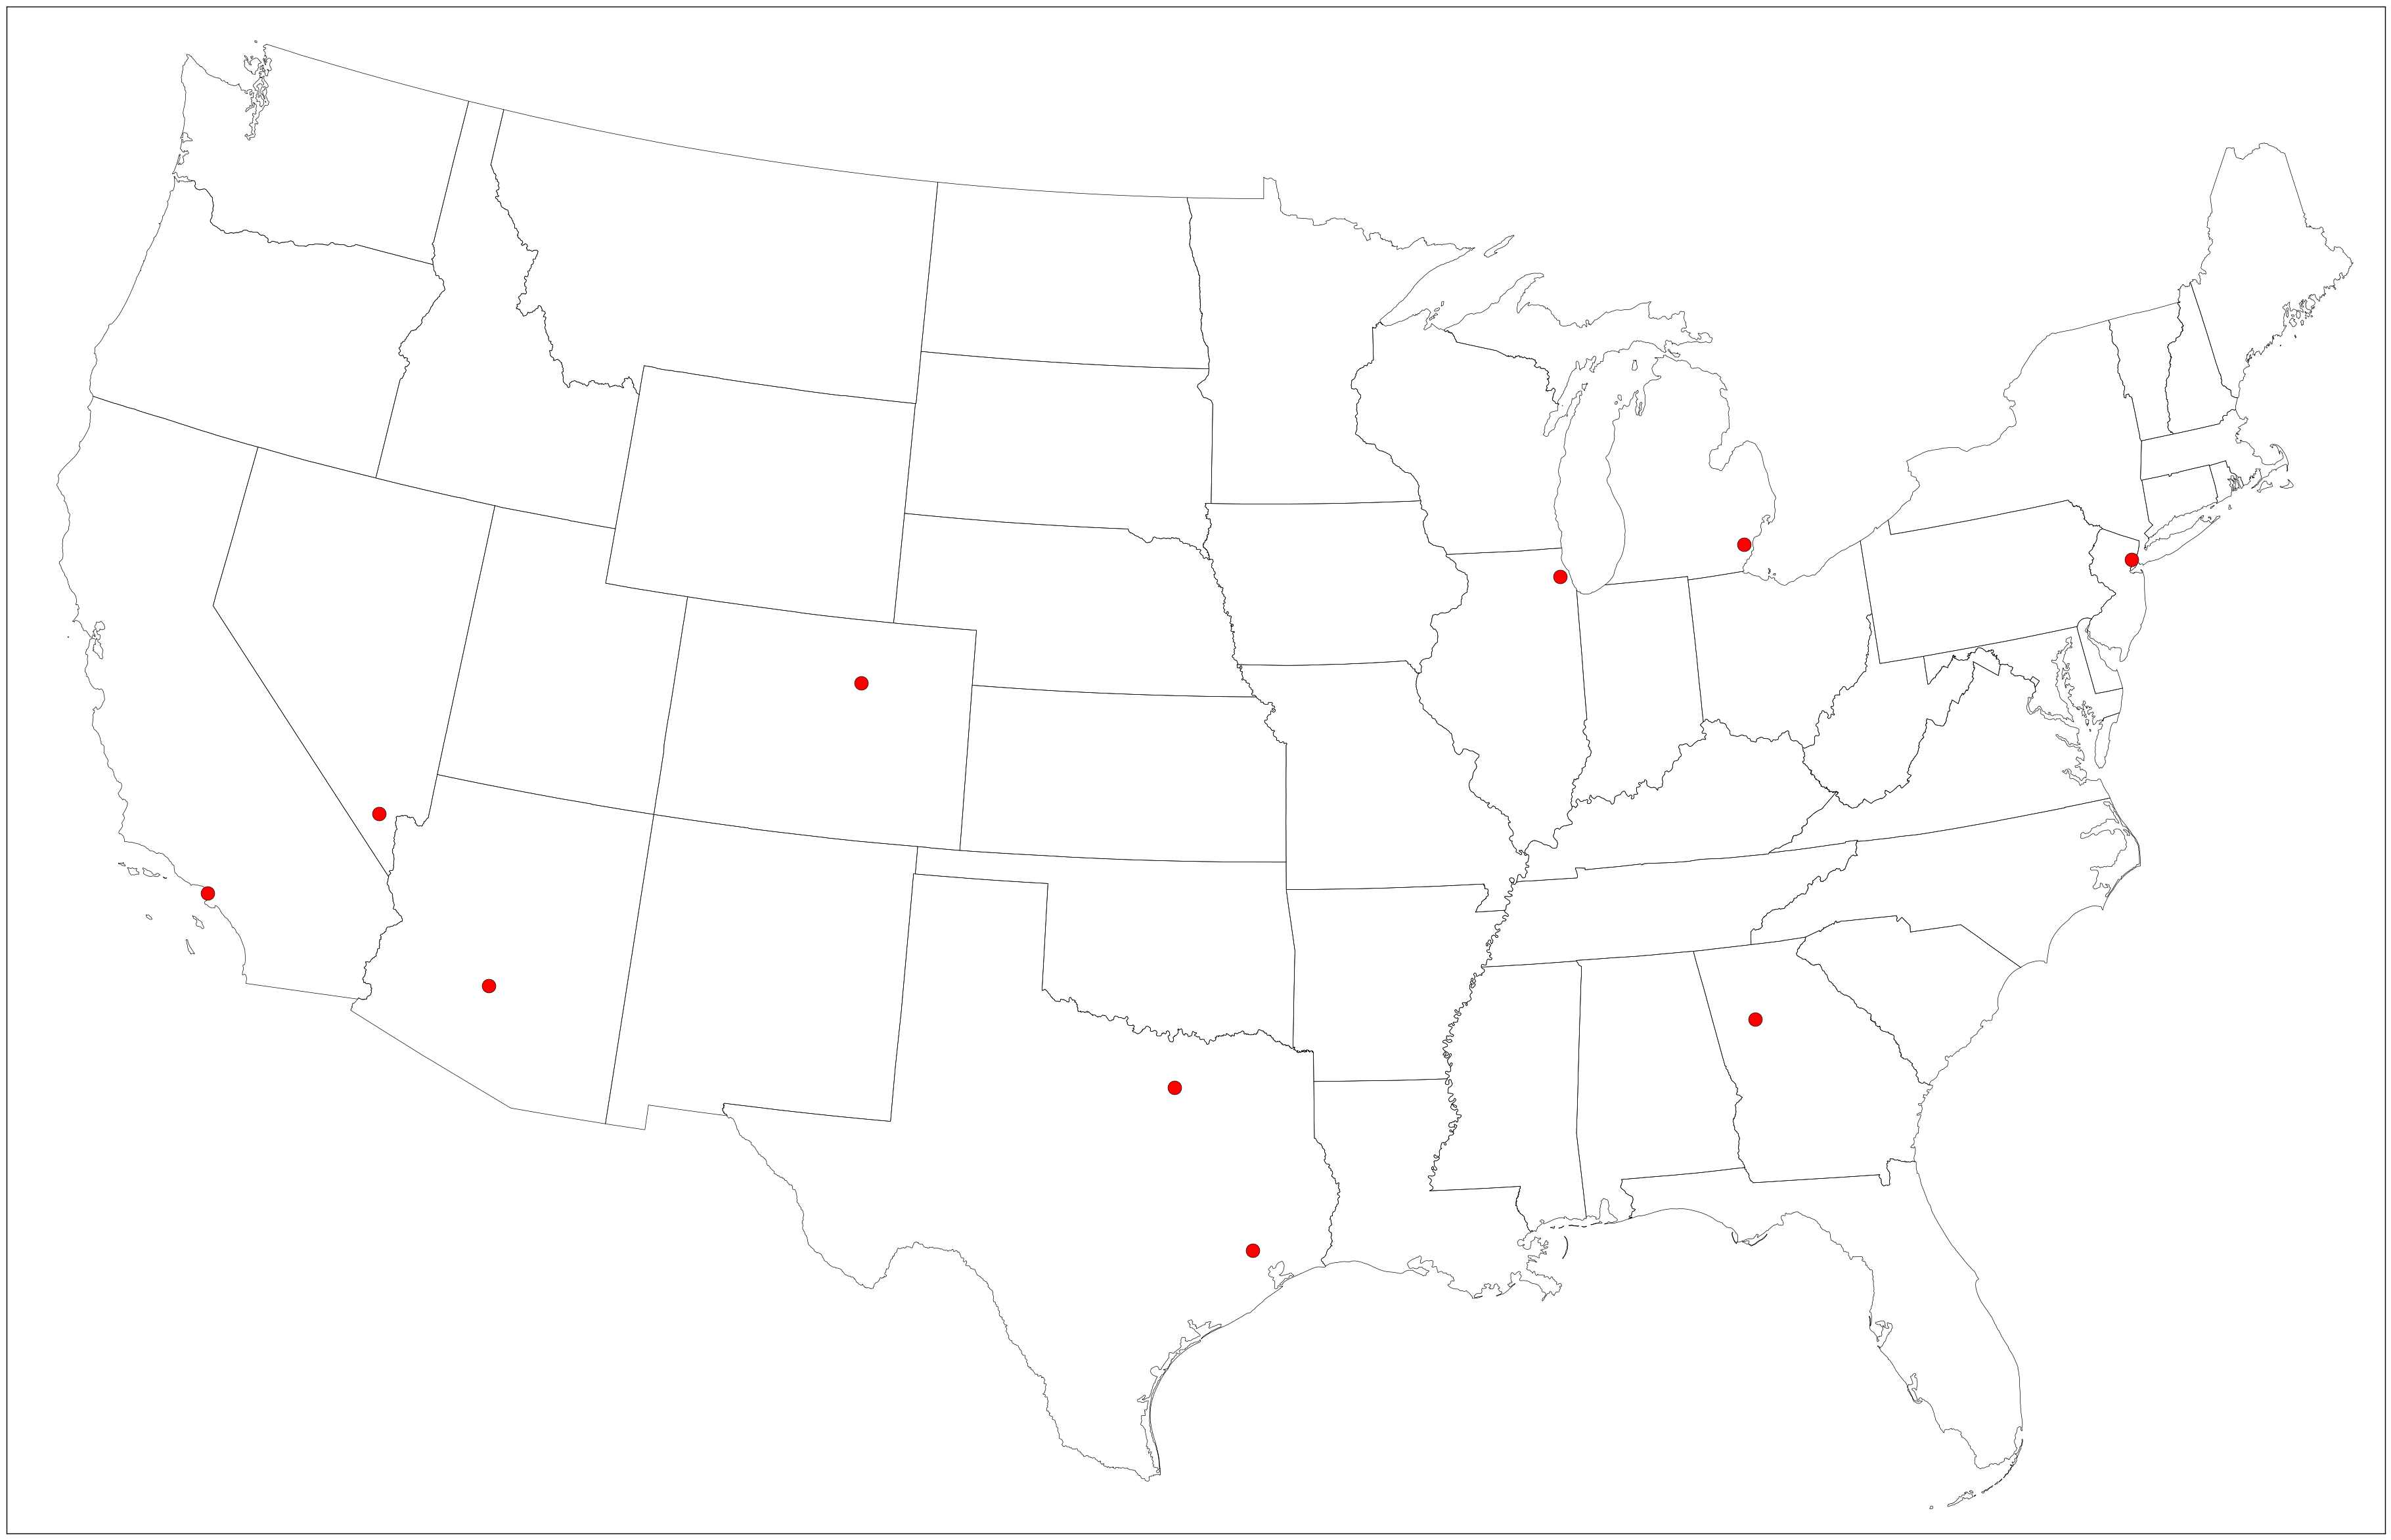

In [13]:
fig = plt.figure(figsize=(50,30))
# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
#seg = map.states[state_names.index('Texas')]
#poly = Polygon(seg, facecolor='red',edgecolor='red')
#ax.add_patch(poly)

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(dfAirports['longitude'].values, dfAirports['latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=15)

plt.show()

Veamos una grafica de cuantos Vuelos se atrasaron por DIA Y POR MES

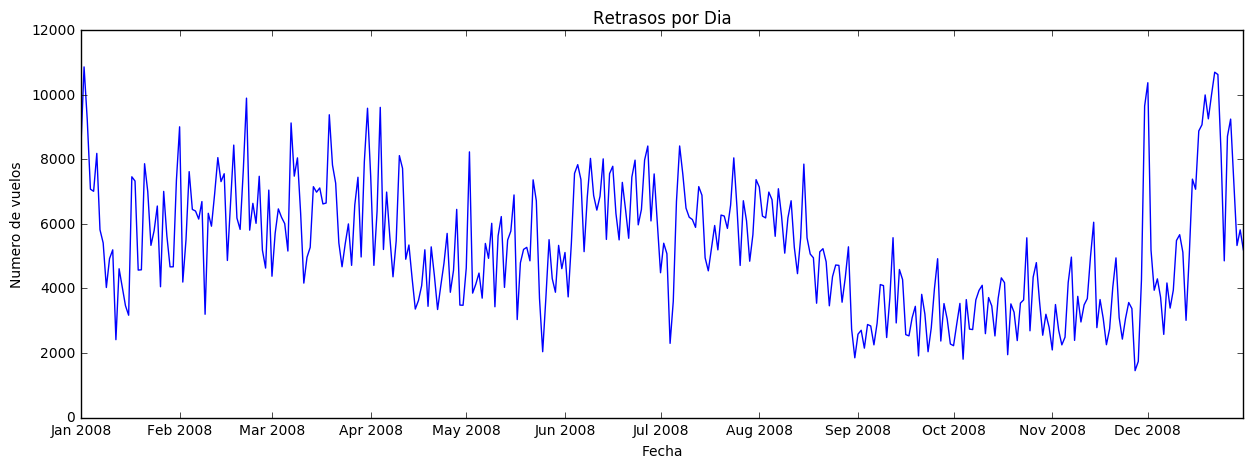

In [14]:
Group = DelayedFlights.groupby(['Year','Month','DayofMonth'])['DayofMonth'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(DelayedFlights.DateTime.unique(), Count['count'], '-')
ax.set_ylabel('Numero de vuelos')
ax.set_xlabel('Fecha')
ax.set_title('Retrasos por Dia')

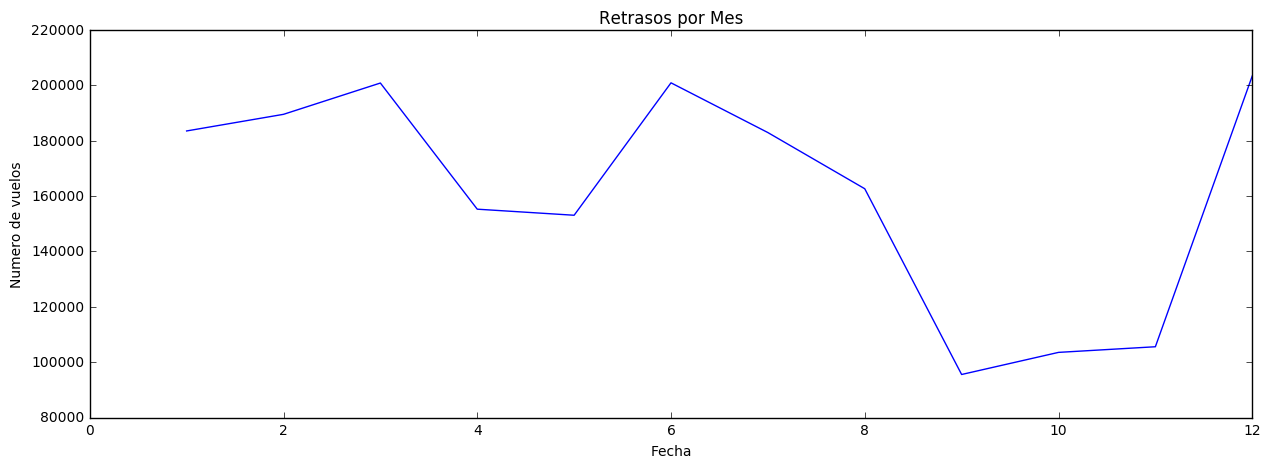

In [15]:
Group = DelayedFlights.groupby(['Year', 'Month'])['Month'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(DelayedFlights.Month.unique(), Count['count'], '-')
ax.set_ylabel('Numero de vuelos')
ax.set_xlabel('Fecha')
ax.set_title('Retrasos por Mes')

Veamos una grafica de vuelos atrasados por aerolinea y Graficamos

In [16]:
DelayedUniqueCarrier = DelayedFlights.groupby('UniqueCarrier').size()
DelayedUniqueCarrier.sort_values(inplace=True, ascending=False)
#DelayedUniqueCarrier

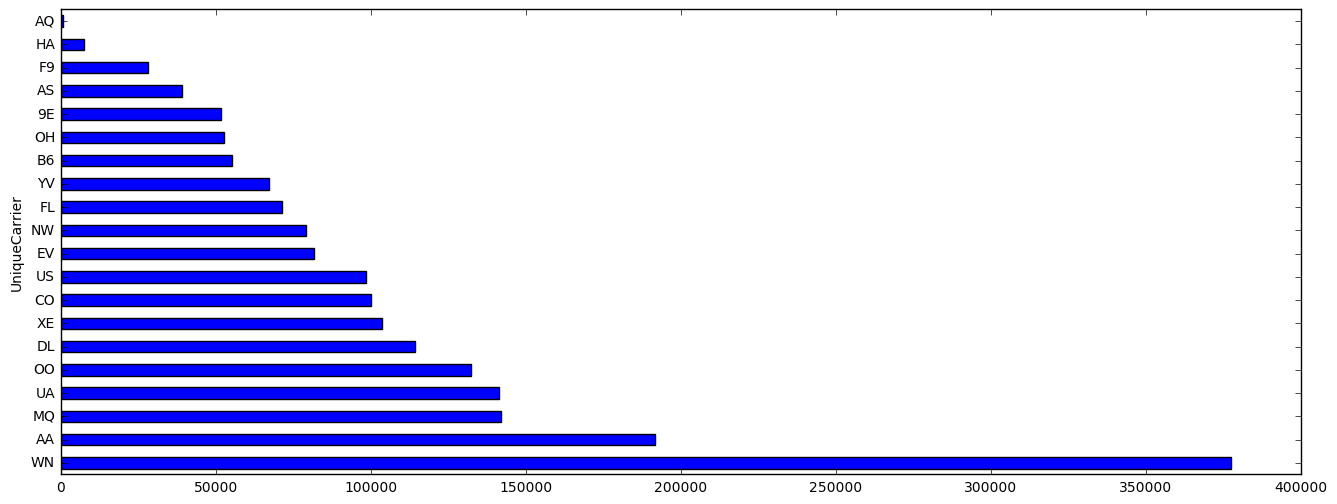

In [17]:
DelayedUniqueCarrier.plot(kind='barh', stacked=True, figsize=[16,6])

Podemos realizar una grafica por tipo de retraso

In [18]:
DelayType = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
DelayTypebyDay = DelayedFlights.pivot_table(index='DateTS', values=DelayType, aggfunc='count')
DelayTypebyDay.head(10)

,CarrierDelay,LateAircraftDelay,NASDelay,SecurityDelay,WeatherDelay
DateTS,,,,,
2008-01-01,5777,5777,5777,5777,5777
2008-01-02,7638,7638,7638,7638,7638
2008-01-03,5721,5721,5721,5721,5721
2008-01-04,4462,4462,4462,4462,4462
2008-01-05,4858,4858,4858,4858,4858
2008-01-06,5419,5419,5419,5419,5419
2008-01-07,3720,3720,3720,3720,3720
2008-01-08,3641,3641,3641,3641,3641
2008-01-09,2318,2318,2318,2318,2318


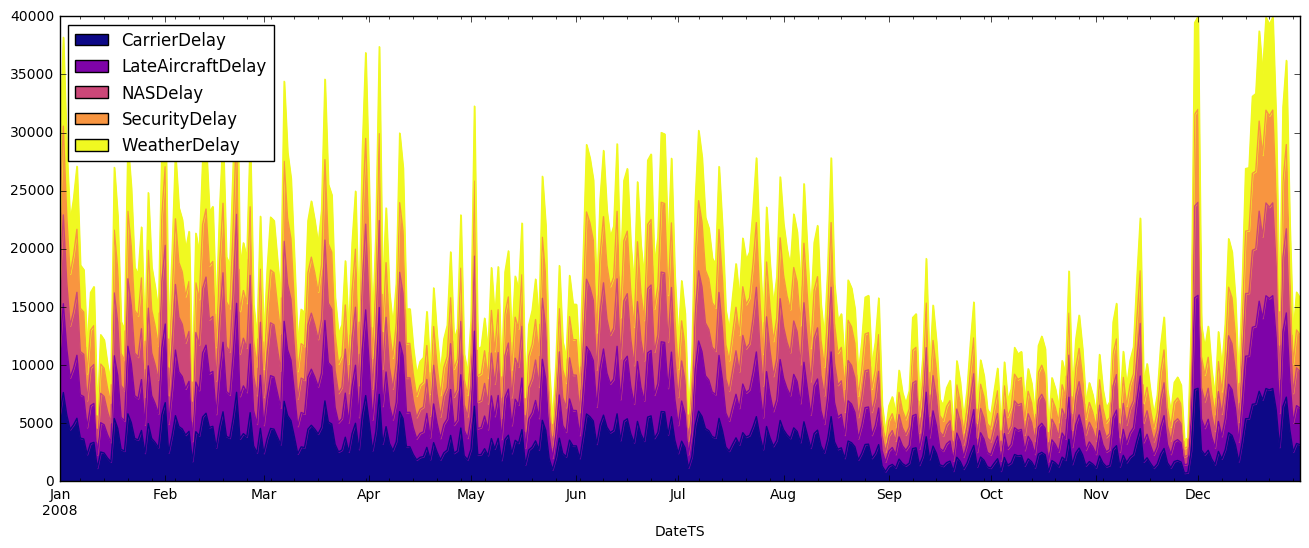

In [19]:
DelayTypebyDay.plot(kind='area', figsize=[16,6], stacked=True, colormap='plasma')

Vamos a ver a que hora se dan mas retrasos **(POR HORA)**

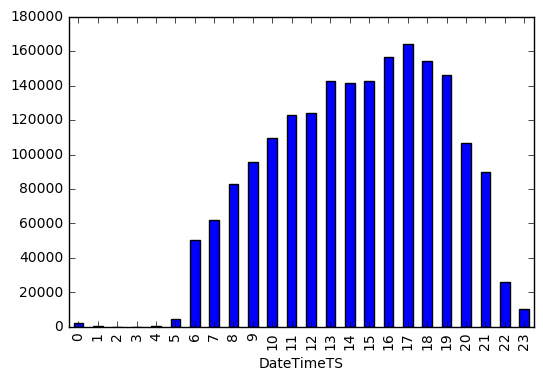

In [20]:
DelayedFlightsBH = DelayedFlights.groupby(by=[DelayedFlights.DateTimeTS.map(lambda x : (x.hour))])
DelayedFlightsBH = DelayedFlightsBH.size()
DelayedFlightsBH.plot(kind='bar')

Validemos con unos graficos si la tendencia de la grafica anterior se repite por Trimestre

In [21]:
DelayedFlightsBH1T = DelayedFlights[(DelayedFlights['Month'] > 0) & (DelayedFlights['Month'] < 4)]
DelayedFlightsBH1T = DelayedFlightsBH1T.groupby(by=[DelayedFlightsBH1T.DateTimeTS.map(lambda x : (x.hour))])
DelayedFlightsBH1T = DelayedFlightsBH1T.size()

DelayedFlightsBH2T = DelayedFlights[(DelayedFlights['Month'] > 3) & (DelayedFlights['Month'] < 7)]
DelayedFlightsBH2T = DelayedFlightsBH2T.groupby(by=[DelayedFlightsBH2T.DateTimeTS.map(lambda x : (x.hour))])
DelayedFlightsBH2T = DelayedFlightsBH2T.size()

DelayedFlightsBH3T = DelayedFlights[(DelayedFlights['Month'] > 6) & (DelayedFlights['Month'] < 10)]
DelayedFlightsBH3T = DelayedFlightsBH3T.groupby(by=[DelayedFlightsBH3T.DateTimeTS.map(lambda x : (x.hour))])
DelayedFlightsBH3T = DelayedFlightsBH3T.size()

DelayedFlightsBH4T = DelayedFlights[(DelayedFlights['Month'] > 9)]
DelayedFlightsBH4T = DelayedFlightsBH4T.groupby(by=[DelayedFlightsBH4T.DateTimeTS.map(lambda x : (x.hour))])
DelayedFlightsBH4T = DelayedFlightsBH4T.size()

Veamos las Graficas por Trimestre, y podemos observar que el comportamiento es similar a la grafica anual

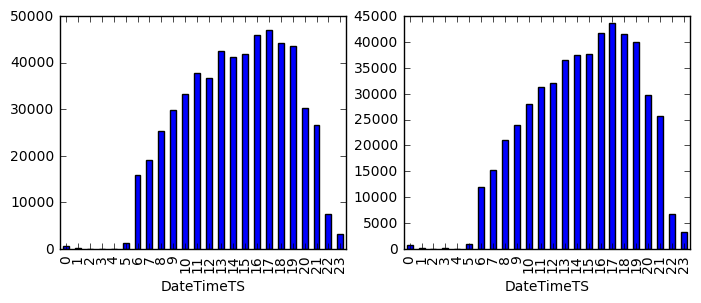

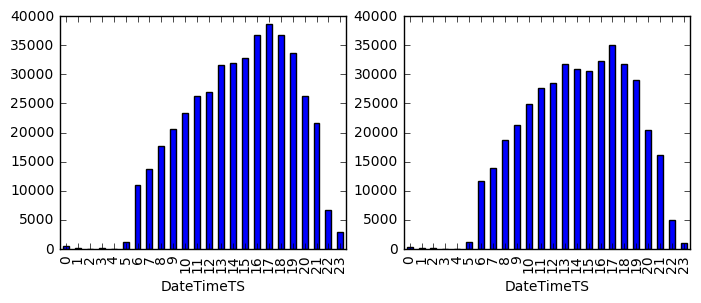

In [22]:
fig3 = plt.figure()

points = fig3.add_subplot(1,4,1)
DelayedFlightsBH1T.plot(kind='bar', figsize=(17,3))

points = fig3.add_subplot(1,4,2)
DelayedFlightsBH2T.plot(kind='bar', figsize=(17,3))

fig3 = plt.figure()
points = fig3.add_subplot(1,4,3)
DelayedFlightsBH3T.plot(kind='bar', figsize=(17,3))

points = fig3.add_subplot(1,4,4)
DelayedFlightsBH4T.plot(kind='bar', figsize=(17,3))